In [1]:
!pip install networkx

Random 2D matrix (Directed Graph):
[[1 1 1 1 1]
 [1 0 0 1 1]
 [1 1 0 0 0]
 [1 1 0 1 0]
 [1 0 0 0 0]]


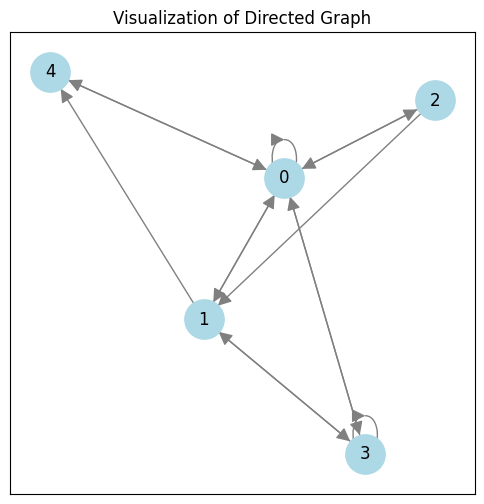

In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the size of the 2D matrix
matrix_size = 5  # Create a 5x5 matrix

# Generate a random 2D matrix of 0s and 1s
p = 0.5  # Probability of a 1 appearing
random_matrix = np.random.choice([0, 1], size=(matrix_size, matrix_size), p=[1-p, p])

# Convert the matrix to a directed graph using NetworkX
directed_graph = nx.from_numpy_array(random_matrix, create_using=nx.DiGraph)

# Print the random matrix
print("Random 2D matrix (Directed Graph):")
print(random_matrix)

# Draw the directed graph
plt.figure(figsize=(6, 6))
nx.draw_networkx(
    directed_graph,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    arrowsize=20,
    node_size=800,
    font_size=12,
)
plt.title("Visualization of Directed Graph")
plt.show()

In [17]:
def bfs(graph, start, target):
    visited = set()  # Set to keep track of visited nodes
    queue = deque([(start, [start])])  # Queue stores (node, path)
    
    while queue:
        current_node, path = queue.popleft()  # Get the first node and its path
        
        if current_node == target:
            return path  # Return the path when we reach the target
        
        if current_node not in visited:
            visited.add(current_node)  # Mark the current node as visited
            
            for neighbor in graph.successors(current_node):  # Explore neighbors
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))  # Add neighbor to the queue
    
    return None

In [18]:
start_node = 0
target_node = 4

# Find the shortest path
shortest_path = bfs(directed_graph, start_node, target_node)

# Print the result
if shortest_path:
    print(f"Shortest path from {start_node} to {target_node}: {shortest_path}")
else:
    print(f"No path exists from {start_node} to {target_node}.")

Shortest path from 0 to 4: [0, 4]


In [21]:
def dfs(graph, start, target, path=None, visited=None):
    """Find one valid path using DFS."""
    if path is None:
        path = []
    if visited is None:
        visited = set()

    path.append(start)
    visited.add(start)

    # Base case: if we reach the target node
    if start == target:
        return path

    # Explore neighbors
    for neighbor in graph.successors(start):
        if neighbor not in visited:
            result = dfs(graph, neighbor, target, path, visited)
            if result is not None:  # If a valid path is found, return it
                return result

    # Backtrack: remove the current node from the path
    path.pop()
    return None

In [22]:
start_node = 0
target_node = 4

# Find one valid path using DFS
valid_path = dfs(directed_graph, start_node, target_node)

# Print the result
if valid_path:
    print(f"One valid path from {start_node} to {target_node}: {valid_path}")
else:
    print(f"No path exists from {start_node} to {target_node}.")

One valid path from 0 to 4: [0, 1, 4]


In [24]:
print(f"Number of nodes covered by BFS: {len(shortest_path)}")
print(f"Number of nodes covered by DFS: {len(valid_path)}")

Number of nodes covered by BFS: 2
Number of nodes covered by DFS: 3
